In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc
from pathlib import Path
import json

import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import colormaps
import re

In [2]:
def df_to_delta(df):
    sps_gtr = 17.95
    sps_g0 = 27.643
    f0 = 200e6
    eta = 1/sps_gtr**2 - 1/sps_g0**2
    return -df/(f0*eta)

In [60]:
def dr_to_delta(dR):
    dR /= 1000
    sps_radius = 1100.
    sps_gtr = 17.95
    return dR/sps_radius*sps_gtr*sps_gtr

In [3]:
def interpolate_50_val(xvals, yvals):
    if np.any(yvals <= 0.5):  # ensure the curve actually crosses 0.5
        idx_above = np.where(yvals > 0.5)[0][-1]   # last index above 0.5
        idx_below = idx_above + 1                  # first index below 0.5

        # Linear interpolation for more accuracy
        x50 = np.interp(0.5, [yvals[idx_above], yvals[idx_below]],
                            [xvals[idx_above], xvals[idx_below]])
        return x50
    else:
        print("Warning: The curve does not cross 0.5")
        return None

# QD.31110

bump_-20mm: delta_50 = -1.337e-3
bump_-18mm: delta_50 = -1.783e-3
bump_-16mm: delta_50 = -2.404e-3
bump_-14mm: delta_50 = -3.017e-3
bump_-12mm: delta_50 = -3.669e-3
bump_-10mm: delta_50 = -4.125e-3
bump_-8mm: delta_50 = -4.805e-3
bump_-6mm: delta_50 = -5.248e-3
bump_-4mm: delta_50 = -5.769e-3
bump_-2mm: delta_50 = -6.270e-3
bump_0mm: delta_50 = -6.518e-3


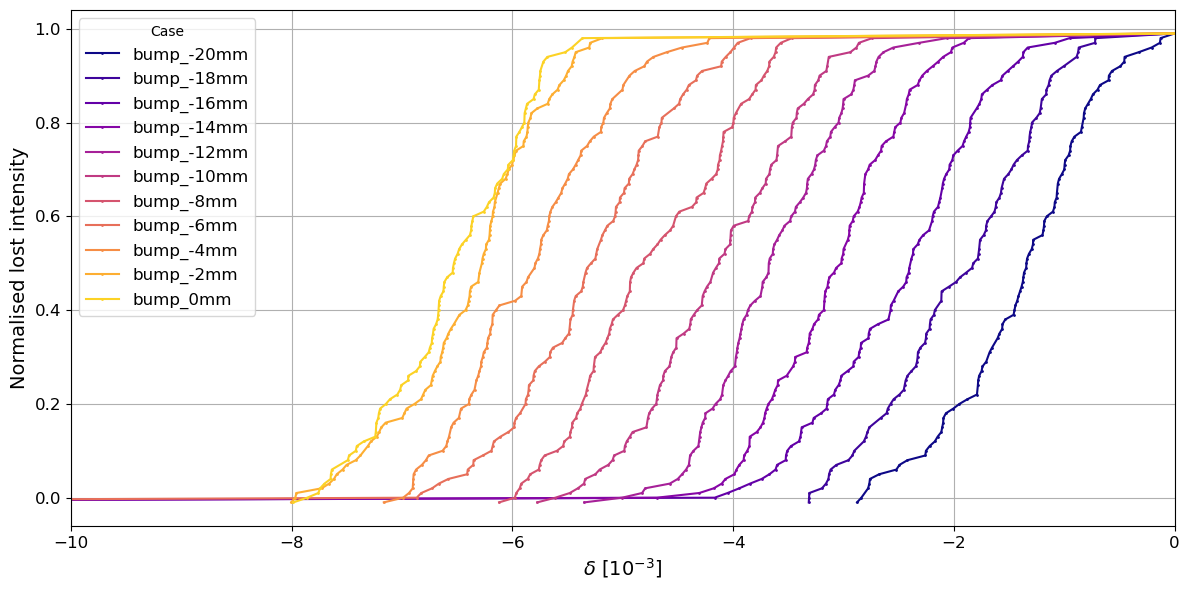

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251017/results/optimised_apertures/qd.31110/')
subdirs = [Path(p/'DPneg') for p in dir.iterdir()]
bumps = [p.stem for p in dir.iterdir()]

bumps, subdirs = zip(
    *sorted(
        zip(bumps, subdirs),
        key=lambda x: int(re.search(r'bump_(-?\d+)mm', x[0]).group(1))
    )
)

bumps = list(bumps)
subdirs = list(subdirs)

input_data = {}
DPneg_vals = {}

cmap = colormaps['plasma']
colors = {base: cmap(i / len(bumps)) for i, base in enumerate(bumps)}

for bump, subdir in zip(bumps, subdirs):
    color = colors[bump]

    with open(subdir / f'IntensityLoss_{bump}.json', 'r') as fid:
        input_data[bump] = json.load(fid)

    turns = list(input_data[bump].keys())
    num_particles = input_data[bump]['num_particles']
    sweep_per_turn = input_data[bump]['sweep_per_turn']
    turns.remove('num_particles')
    turns.remove('sweep_per_turn')

    turns = np.array(turns, dtype=int)
    deltas = df_to_delta(sweep_per_turn * turns)
    deltas = np.concatenate((np.array([0]), deltas))
    counts = np.array([input_data[bump][str(turn)] for turn in turns], dtype=int)
    counts = np.concatenate((np.array([1]), counts))
    label = bump
        
    ax.plot(
        deltas * 1e3,
        1 - np.cumsum(counts) / num_particles,
        marker='o',
        markersize=1,
        label=label,
        color=color,
    )

    val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3

    DPneg_vals[bump.split('_')[-1]] = val_50*1e-3
    print(f'{bump}: delta_50 = {val_50:.3f}e-3')
    delta_50_vals[bump] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 0)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

# QD.50110

bump_-20mm: delta_50 = -1.758e-3
bump_-18mm: delta_50 = -2.318e-3
bump_-16mm: delta_50 = -2.958e-3
bump_-14mm: delta_50 = -3.357e-3
bump_-12mm: delta_50 = -4.084e-3
bump_-10mm: delta_50 = -4.618e-3
bump_-8mm: delta_50 = -5.176e-3
bump_-6mm: delta_50 = -5.702e-3
bump_-4mm: delta_50 = -6.173e-3
bump_-2mm: delta_50 = -6.499e-3
bump_0mm: delta_50 = -6.396e-3


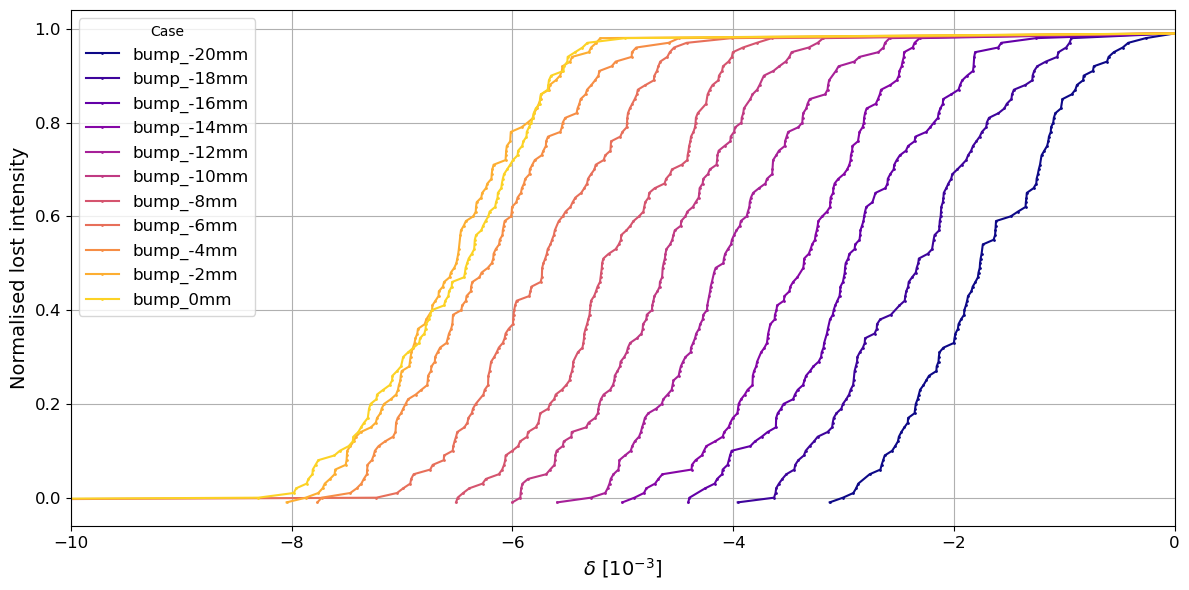

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251017/results/optimised_apertures/qd.50110/')
subdirs = [Path(p/'DPneg') for p in dir.iterdir()]
bumps = [p.stem for p in dir.iterdir()]

bumps, subdirs = zip(
    *sorted(
        zip(bumps, subdirs),
        key=lambda x: int(re.search(r'bump_(-?\d+)mm', x[0]).group(1))
    )
)

bumps = list(bumps)
subdirs = list(subdirs)

input_data = {}
DPneg_vals = {}

cmap = colormaps['plasma']
colors = {base: cmap(i / len(bumps)) for i, base in enumerate(bumps)}

for bump, subdir in zip(bumps, subdirs):
    color = colors[bump]

    with open(subdir / f'IntensityLoss_{bump}.json', 'r') as fid:
        input_data[bump] = json.load(fid)

    turns = list(input_data[bump].keys())
    num_particles = input_data[bump]['num_particles']
    sweep_per_turn = input_data[bump]['sweep_per_turn']
    turns.remove('num_particles')
    turns.remove('sweep_per_turn')

    turns = np.array(turns, dtype=int)
    deltas = df_to_delta(sweep_per_turn * turns)
    deltas = np.concatenate((np.array([0]), deltas))
    counts = np.array([input_data[bump][str(turn)] for turn in turns], dtype=int)
    counts = np.concatenate((np.array([1]), counts))
    label = bump
        
    ax.plot(
        deltas * 1e3,
        1 - np.cumsum(counts) / num_particles,
        marker='o',
        markersize=1,
        label=label,
        color=color,
    )

    val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3

    DPneg_vals[bump.split('_')[-1]] = val_50*1e-3
    print(f'{bump}: delta_50 = {val_50:.3f}e-3')
    delta_50_vals[bump] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 0)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

# QD.20110

bump_-20mm: delta_50 = -1.526e-3
bump_-18mm: delta_50 = -2.139e-3
bump_-16mm: delta_50 = -2.735e-3
bump_-14mm: delta_50 = -3.201e-3
bump_-12mm: delta_50 = -3.819e-3
bump_-10mm: delta_50 = -4.557e-3
bump_-8mm: delta_50 = -5.089e-3
bump_-6mm: delta_50 = -5.666e-3
bump_-4mm: delta_50 = -6.151e-3
bump_-2mm: delta_50 = -6.510e-3
bump_0mm: delta_50 = -6.541e-3


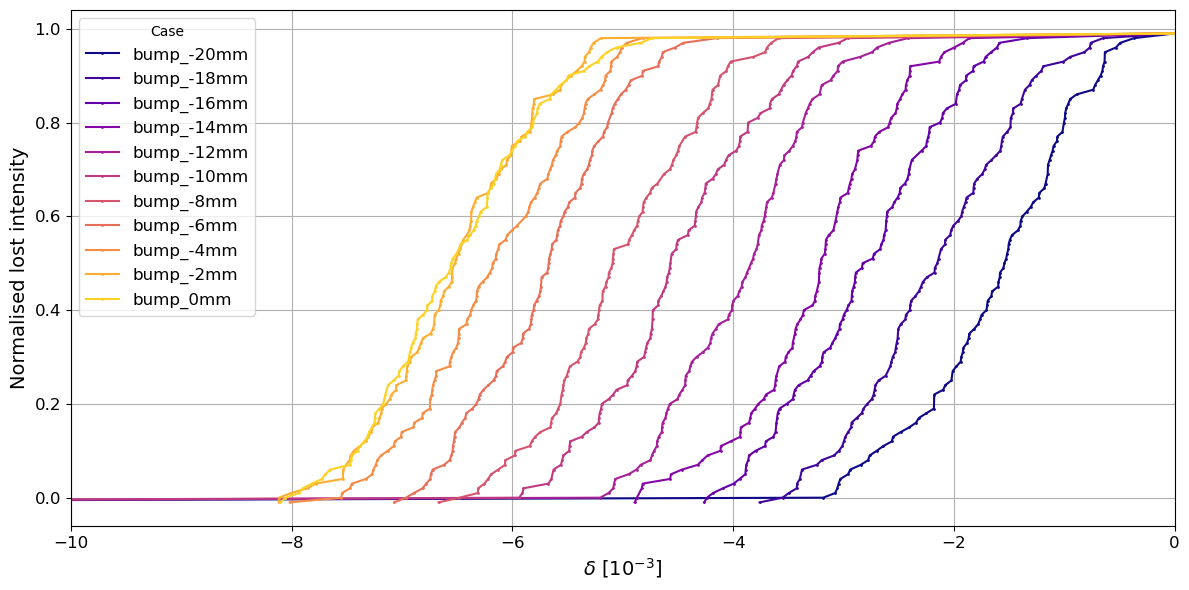

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251017/results/optimised_apertures/qd.20110/')
subdirs = [Path(p/'DPneg') for p in dir.iterdir()]
bumps = [p.stem for p in dir.iterdir()]

bumps, subdirs = zip(
    *sorted(
        zip(bumps, subdirs),
        key=lambda x: int(re.search(r'bump_(-?\d+)mm', x[0]).group(1))
    )
)

bumps = list(bumps)
subdirs = list(subdirs)

input_data = {}
DPneg_vals = {}

cmap = colormaps['plasma']
colors = {base: cmap(i / len(bumps)) for i, base in enumerate(bumps)}

for bump, subdir in zip(bumps, subdirs):
    color = colors[bump]

    with open(subdir / f'IntensityLoss_{bump}.json', 'r') as fid:
        input_data[bump] = json.load(fid)

    turns = list(input_data[bump].keys())
    num_particles = input_data[bump]['num_particles']
    sweep_per_turn = input_data[bump]['sweep_per_turn']
    turns.remove('num_particles')
    turns.remove('sweep_per_turn')

    turns = np.array(turns, dtype=int)
    deltas = df_to_delta(sweep_per_turn * turns)
    deltas = np.concatenate((np.array([0]), deltas))
    counts = np.array([input_data[bump][str(turn)] for turn in turns], dtype=int)
    counts = np.concatenate((np.array([1]), counts))
    label = bump
        
    ax.plot(
        deltas * 1e3,
        1 - np.cumsum(counts) / num_particles,
        marker='o',
        markersize=1,
        label=label,
        color=color,
    )

    val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3

    DPneg_vals[bump.split('_')[-1]] = val_50*1e-3
    print(f'{bump}: delta_50 = {val_50:.3f}e-3')
    delta_50_vals[bump] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 0)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

# Midpoints

In [88]:
input_data = {}
delta_50_vals = {}

for quad in ['qd.31110', 'qd.50110', 'qd.20110']:
    dir = Path(f'/Users/lisepauwels/sps_simulations/Prototyping/20251017/results/optimised_apertures/{quad}/')
    subdirs = [Path(p/'DPneg') for p in dir.iterdir()]
    bumps = [p.stem for p in dir.iterdir()]

    bumps, subdirs = zip(
        *sorted(
            zip(bumps, subdirs),
            key=lambda x: int(re.search(r'bump_(-?\d+)mm', x[0]).group(1))
        )
    )

    bumps = list(bumps)[:11]
    subdirs = list(subdirs)[:11]

    delta_50_vals[quad] = {}

    for bump, subdir in zip(bumps, subdirs):
        with open(subdir / f'IntensityLoss_{bump}.json', 'r') as fid:
            input_data[bump] = json.load(fid)

        turns = list(input_data[bump].keys())
        num_particles = input_data[bump]['num_particles']
        sweep_per_turn = input_data[bump]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[bump][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3

        delta_50_vals[quad][bump.split('_')[-1]] = float(val_50*1e-3)

In [87]:
bumps[:11]

['bump_-20mm',
 'bump_-18mm',
 'bump_-16mm',
 'bump_-14mm',
 'bump_-12mm',
 'bump_-10mm',
 'bump_-8mm',
 'bump_-6mm',
 'bump_-4mm',
 'bump_-2mm',
 'bump_0mm']

In [8]:
list(delta_50_vals[quad].keys())

['-20mm',
 '-18mm',
 '-16mm',
 '-14mm',
 '-12mm',
 '-10mm',
 '-8mm',
 '-6mm',
 '-4mm',
 '-2mm',
 '0mm']

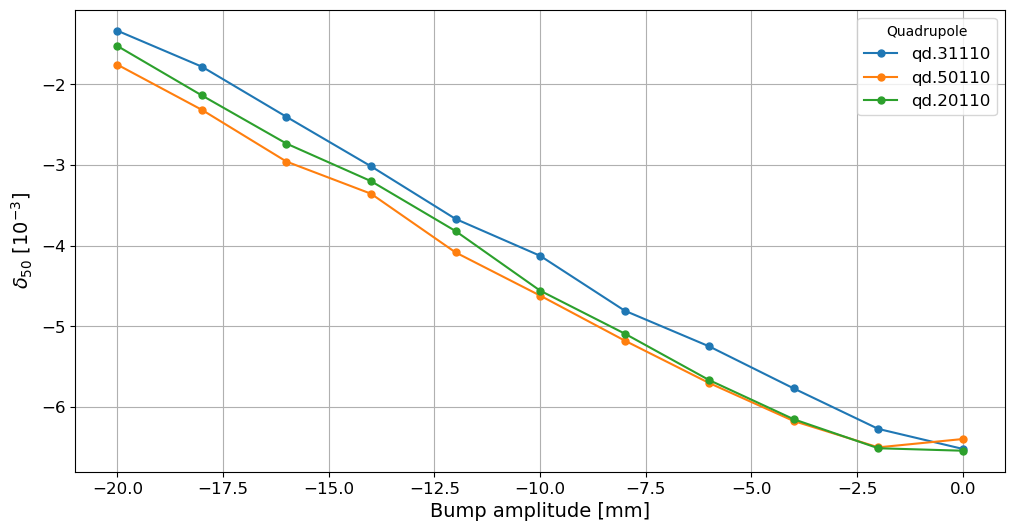

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

for quad in ['qd.31110', 'qd.50110', 'qd.20110']:
    keys = list(delta_50_vals[quad].keys())
    bumps = sorted(keys, key=lambda x: int(re.search(r'(-?\d+)mm', x).group(1)))
    delta_50s = [delta_50_vals[quad][bump] * 1e3 for bump in bumps]

    ax.plot(
        [float(bump.split('mm')[0]) for bump in bumps],
        delta_50s,
        marker='o',
        markersize=5,
        label=quad,
    )
ax.grid()
ax.set_xlabel('Bump amplitude [mm]', fontsize=14)
ax.set_ylabel(r'$\delta_{50}$ $[10^{-3}]$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(title='Quadrupole', fontsize=12)

In [11]:
with open('midpoints_DPneg_MD.json', 'r') as fid:
    midpoints_DPneg_MD = json.load(fid)

In [13]:
midpoints_DPneg_MD

{'QD.10910': {'-20': [-8.479041916167665,
   -8.479041916167665,
   -8.67065868263473],
  '-18': [-10.107784431137723, -10.107784431137723, -10.203592814371257],
  '-16': [-11.544910179640718, -11.449101796407184, -11.544910179640718],
  '-14': [-12.598802395209582, -12.88622754491018, -12.694610778443113],
  '-12': [-13.940119760479043, -13.940119760479043, -14.035928143712574],
  '-10': [-15.377245508982035, -15.281437125748504, -15.18562874251497],
  '-8': [-16.526946107784433, -16.431137724550897, -16.335329341317365],
  '-6': [-17.580838323353294, -17.676646706586826, -17.676646706586826],
  '-4': [-17.868263473053894, -17.868263473053894, -17.868263473053894],
  '-2': [-17.868263473053894, -17.868263473053894, -17.868263473053894],
  '2': [-17.676646706586826, -17.676646706586826, -17.580838323353294],
  '4': [-17.48502994011976, -17.580838323353294, -17.48502994011976],
  '6': [-17.48502994011976, -17.48502994011976, -17.48502994011976],
  '8': [-17.389221556886227, -17.29341317

In [25]:
quad = 'QD.31110'
midpoints_loc = [np.mean(midpoints_DPneg_MD[quad][_.split('mm')[0]]) for _ in bumps if _ != '0mm']

In [26]:
midpoints_loc

[np.float64(-2.0918163672654693),
 np.float64(-3.4650698602794407),
 np.float64(-4.934131736526947),
 np.float64(-6.4351297405189625),
 np.float64(-7.8083832335329335),
 np.float64(-9.27744510978044),
 np.float64(-10.714570858283432),
 np.float64(-12.215568862275447),
 np.float64(-13.620758483033933),
 np.float64(-15.121756487025948)]

In [19]:
delta_50_vals['qd.31110']

{'-20mm': -0.0013370699020122483,
 '-18mm': -0.0017827598693496642,
 '-16mm': -0.002403940261326188,
 '-14mm': -0.003016763966415135,
 '-12mm': -0.003668585543646106,
 '-10mm': -0.004125417760166957,
 '-8mm': -0.004805094960356517,
 '-6mm': -0.005247999365398074,
 '-4mm': -0.00576889951472368,
 '-2mm': -0.0062703007279782735,
 '0mm': -0.00651821577230971}

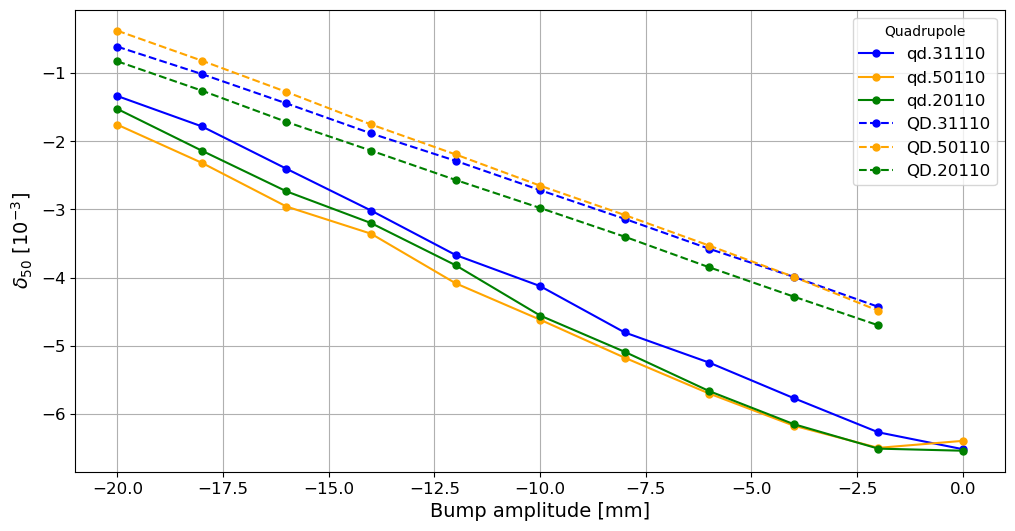

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = {'qd.31110': 'blue', 'qd.50110': 'orange', 'qd.20110': 'green'}
for quad in ['qd.31110', 'qd.50110', 'qd.20110']:
    keys = list(delta_50_vals[quad].keys())
    bumps = sorted(keys, key=lambda x: int(re.search(r'(-?\d+)mm', x).group(1)))
    delta_50s = [delta_50_vals[quad][bump] * 1e3 for bump in bumps]
    
    ax.plot(
        [float(bump.split('mm')[0]) for bump in bumps],
        delta_50s,
        marker='o',
        markersize=5,
        label=quad,
        color=colors[quad]
    )

for quad in ['QD.31110', 'QD.50110', 'QD.20110']:
    midpoints_loc = np.array([np.mean(midpoints_DPneg_MD[quad][_.split('mm')[0]]) for _ in bumps if _ != '0mm'])
    ax.plot(
        [float(bump.split('mm')[0]) for bump in bumps if bump != '0mm'],
        dr_to_delta(midpoints_loc) * 1e3,
        marker='o',
        ls='--',
        markersize=5,
        label=quad,
        color=colors[quad.lower()]
    )
ax.grid()
ax.set_xlabel('Bump amplitude [mm]', fontsize=14)
ax.set_ylabel(r'$\delta_{50}$ $[10^{-3}]$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(title='Quadrupole', fontsize=12)

ht condor 10000 deeltjes

orbit data

In [57]:
dr_to_delta(np.array(midpoints_loc))

array([-0.00061272, -0.00101496, -0.00144526, -0.00188492, -0.00228716,
       -0.00271747, -0.00313842, -0.00357808, -0.00398967, -0.00442933])

In [29]:
[float(bump.split('mm')[0]) for bump in bumps if bump != '0mm']

[-20.0, -18.0, -16.0, -14.0, -12.0, -10.0, -8.0, -6.0, -4.0, -2.0]

In [30]:
[float(bump.split('mm')[0]) for bump in bumps]

[-20.0, -18.0, -16.0, -14.0, -12.0, -10.0, -8.0, -6.0, -4.0, -2.0, 0.0]

In [37]:
def dr_to_delta(dR):
    dR /= 1000
    sps_radius = 1100.
    sps_gtr = 17.95
    return dR/sps_radius*sps_gtr*sps_gtr

In [50]:
np.array([[kk, np.mean(vv)] for kk, vv in midpoints_DPneg_MD['QD.31110'].items()]).T

array([['-20', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2',
        '2', '20'],
       ['-2.0918163672654693', '-3.4650698602794407',
        '-4.934131736526947', '-6.4351297405189625',
        '-7.8083832335329335', '-9.27744510978044',
        '-10.714570858283432', '-12.215568862275447',
        '-13.620758483033933', '-15.121756487025948',
        '-17.86826347305389', '-16.52694610778443']], dtype='<U32')

In [40]:
arr = np.array([[kk, np.mean(vv)] for kk, vv in midpoints_DPneg_MD['QD.31110'].items()]).T
ax.plot(arr[0], 1000*dr_to_delta(arr[1]), '-', label='QD.31110')

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [31]:
midpoints_loc

[np.float64(-2.8263473053892216),
 np.float64(-4.295409181636726),
 np.float64(-5.860279441117764),
 np.float64(-7.297405189620759),
 np.float64(-8.766467065868262),
 np.float64(-10.171656686626745),
 np.float64(-11.60878243512974),
 np.float64(-13.141716566866267),
 np.float64(-14.610778443113773),
 np.float64(-16.047904191616766)]

In [32]:
delta_50s

[-1.52648813813065,
 -2.139311843219597,
 -2.735422174533391,
 -3.200611077941819,
 -3.819005907622484,
 -4.557179916025079,
 -5.08922231453412,
 -5.665833709776901,
 -6.150521549256343,
 -6.509859085422135,
 -6.5405002706765805]

# Positive and negative sweep

In [101]:
input_data = {}
DPneg_vals = {}
DPpos_vals = {}
delta_50_vals = {}

for quad in ['qd.31110', 'qd.50110', 'qd.20110']:
    DPneg_vals[quad] = {}
    DPpos_vals[quad] = {}
    dir = Path(f'/Users/lisepauwels/sps_simulations/Prototyping/20251017/results/optimised_apertures/{quad}/')
    subdirs = [p for p in dir.iterdir()]
    bumps = [p.stem for p in dir.iterdir()]

    bumps, subdirs = zip(
        *sorted(
            zip(bumps, subdirs),
            key=lambda x: int(re.search(r'bump_(-?\d+)mm', x[0]).group(1))
        )
    )

    bumps = list(bumps)
    subdirs = list(subdirs)

    #DPneg
    bumps_neg = bumps[:11]
    subdirs_neg = subdirs[:11]


    for bump, subdir in zip(bumps_neg, subdirs_neg):
        with open(subdir / 'DPneg' / f'IntensityLoss_{bump}.json', 'r') as fid:
            input_data[bump] = json.load(fid)

        turns = list(input_data[bump].keys())
        num_particles = input_data[bump]['num_particles']
        sweep_per_turn = input_data[bump]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[bump][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3

        DPneg_vals[quad][bump.split('_')[-1]] = val_50*1e-3
    
    # DPpos
    bumps_pos = bumps[10:]
    subdirs_pos = subdirs[10:]

    for bump, subdir in zip(bumps_pos, subdirs_pos):
        with open(subdir / 'DPpos' / f'IntensityLoss_{bump}.json', 'r') as fid:
            input_data[bump] = json.load(fid)

        turns = list(input_data[bump].keys())
        num_particles = input_data[bump]['num_particles']
        sweep_per_turn = input_data[bump]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[bump][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3

        DPpos_vals[quad][bump.split('_')[-1]] = val_50*1e-3

In [125]:
np.array(list(DPneg_vals['qd.31110'].values()))
np.linspace(-20,0,11)*1e-3
# np.array(list(DPneg_vals['qd.31110'].keys()))

array([-0.02 , -0.018, -0.016, -0.014, -0.012, -0.01 , -0.008, -0.006,
       -0.004, -0.002,  0.   ])

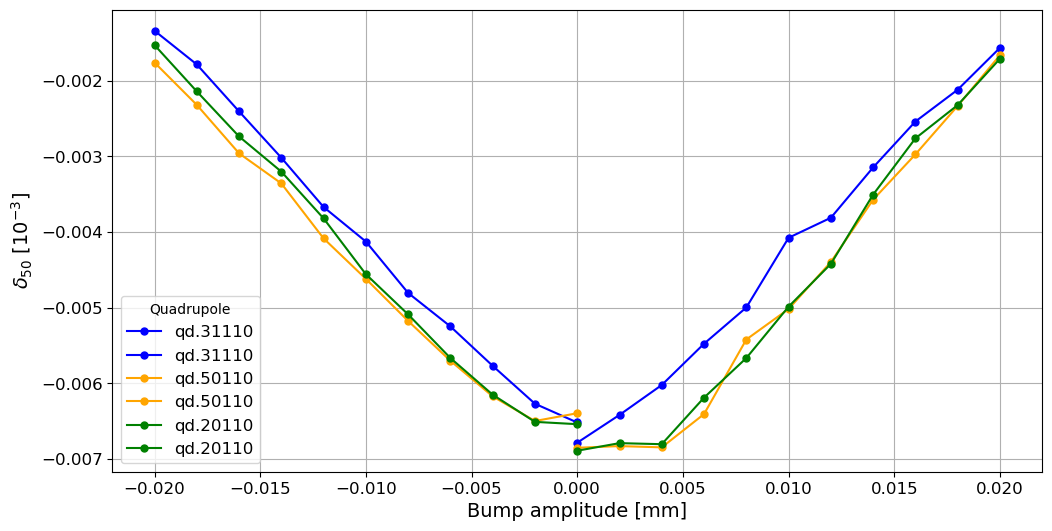

In [129]:
fig, ax = plt.subplots(figsize=(12, 6))

for quad in ['qd.31110', 'qd.50110', 'qd.20110']:

    # keys = list(delta_50_vals[quad].keys())
    # bumps = sorted(keys, key=lambda x: int(re.search(r'(-?\d+)mm', x).group(1)))
    # delta_50s = [delta_50_vals[quad][bump] * 1e3 for bump in bumps]

    ax.plot(
        np.linspace(-20,0,11)*1e-3,
        np.array(list(DPneg_vals[quad].values())),
        marker='o',
        markersize=5,
        label=quad,
        color=colors[quad]
    )

    ax.plot(
        np.linspace(0,20,11)*1e-3,
        -np.array(list(DPpos_vals[quad].values())),
        marker='o',
        markersize=5,
        label=quad,
        color=colors[quad]
    )
ax.grid()
ax.set_xlabel('Bump amplitude [mm]', fontsize=14)
ax.set_ylabel(r'$\delta_{50}$ $[10^{-3}]$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(title='Quadrupole', fontsize=12)

In [81]:
delta_50_vals['qd.20110']

{'-20mm': 0.006949977928167832,
 '-18mm': 0.006860839934700349,
 '-16mm': -0.002735422174533391,
 '-14mm': -0.003200611077941819,
 '-12mm': -0.003819005907622484,
 '-10mm': -0.004557179916025079,
 '-8mm': -0.00508922231453412,
 '-6mm': -0.005665833709776902,
 '-4mm': -0.006150521549256343,
 '-2mm': -0.006509859085422134,
 '0mm': 0.006891481119954797,
 '2mm': 0.006791200877303877,
 '4mm': 0.006805128688783172,
 '6mm': 0.006189519421398366,
 '8mm': 0.005665833709776902,
 '10mm': 0.004986156509587342,
 '12mm': 0.0044206873635279954,
 '14mm': 0.003504237368190434,
 '16mm': 0.0027604922351961206,
 '18mm': 0.0023203733924504226,
 '20mm': 0.0017075496873614753}

In [130]:
import xcoll as xc
print(xc.citation)

F.F. Van der Veken, et al.: Recent Developments with the New Tools for Collimation Simulations in Xsuite, Proceedings of HB2023, Geneva, Switzerland.
